# Example for analyzing data with MCdata

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import MCdata
sns.set_context("talk")

## Load Data with MCdata

In [33]:
mcdata = MCdata.MCdata("../Data/L_72-example")
mcdata.rawdata

## Get data(mean/error) from raw binning data

In [35]:
dfpoints = mcdata.pointdata()

In [36]:
dfpoints

,temperature,field,Chern,M,M2,M4,E,E2,Chern_err,M_err,M2_err,M4_err,E_err,E2_err
0,0.32728,0.00,2.942716,0.015416,0.000316,2.427266e-07,-3.685932,13.586105,0.410939,0.000404,0.000017,2.678376e-08,0.000062,0.000459
1,0.33343,0.00,3.229902,0.015753,0.000331,2.640738e-07,-3.679367,13.537751,0.401934,0.000343,0.000015,2.521362e-08,0.000056,0.000416
2,0.33970,0.00,2.858334,0.015301,0.000310,2.329497e-07,-3.672684,13.488616,0.446923,0.000292,0.000013,2.038473e-08,0.000048,0.000356
3,0.34609,0.00,2.924681,0.015686,0.000326,2.516566e-07,-3.665821,13.438255,0.479959,0.000382,0.000017,2.524329e-08,0.000067,0.000491
4,0.35259,0.00,3.128394,0.016077,0.000345,2.858420e-07,-3.658865,13.387305,0.448649,0.000401,0.000018,2.921079e-08,0.000082,0.000598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,2.22774,0.49,-44.119252,0.143800,0.020858,4.499356e-04,-1.192012,1.421291,0.193359,0.000090,0.000026,1.155478e-06,0.000111,0.000265
5396,2.26961,0.49,-39.981189,0.135157,0.018435,3.520760e-04,-1.158529,1.342577,0.288670,0.000080,0.000022,8.565507e-07,0.000064,0.000148
5397,2.31227,0.49,-36.328763,0.126990,0.016288,2.757264e-04,-1.126555,1.269499,0.241489,0.000104,0.000027,9.308570e-07,0.000086,0.000192
5398,2.35572,0.49,-33.107194,0.119386,0.014407,2.164069e-04,-1.096290,1.202214,0.111791,0.000046,0.000011,3.391557e-07,0.000048,0.000105


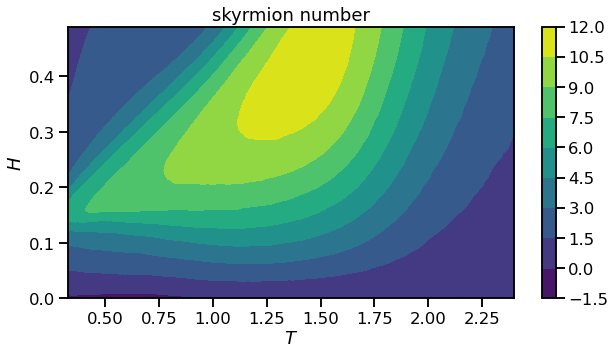

In [37]:
%matplotlib inline
plt.figure(figsize = (10,5))
plt.tricontourf(dfpoints.temperature, dfpoints.field, -dfpoints.Chern/(4*np.pi))
plt.title("skyrmion number")
plt.ylabel(r"$H$")
plt.xlabel(r"$T$")
plt.colorbar()

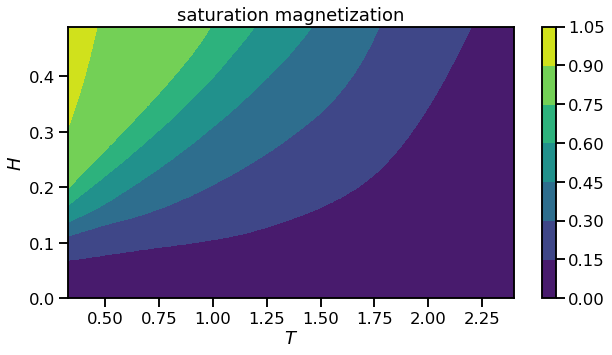

In [38]:
%matplotlib inline
plt.figure(figsize = (10,5))
plt.tricontourf(dfpoints.temperature, dfpoints.field, dfpoints.M)
plt.title("saturation magnetization")
plt.ylabel(r"$H$")
plt.xlabel(r"$T$")
plt.colorbar()

## Use ***MCdata.bootstrap*** to obtain estimation for property

In [48]:
# define the function to get the specific heat from the fluctuation of energy.
def specific_heat(E, E2, T):
    return (E2 - E**2) / T**2 * 72**2

# Using the bootstrap method to get the specific heat
dfpoints["Cv"], dfpoints["Cv_err"] = MCdata.bootstrap(mcdata.rawdata, columns = [ "E", "E2", "temperature"], func = specific_heat)

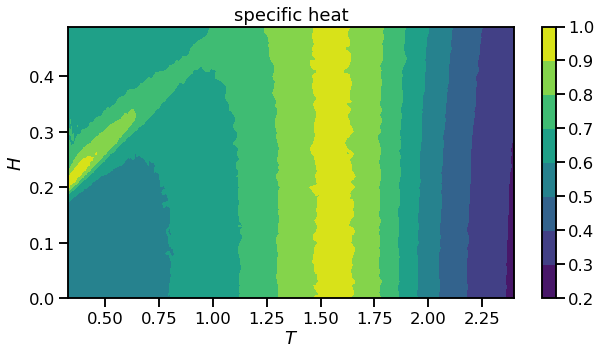

In [49]:
%matplotlib inline
plt.figure(figsize = (10,5))

plt.tricontourf(dfpoints.temperature, dfpoints.field, dfpoints.Cv)
plt.title("specific heat")
plt.ylabel(r"$H$")
plt.xlabel(r"$T$")
plt.colorbar()

## Demo on line plots

In [52]:
T1, T2, T3, T4 = (dfpoints.temperature.unique()[0],
                  dfpoints.temperature.unique()[20],
                  dfpoints.temperature.unique()[40],
                  dfpoints.temperature.unique()[60])
cut1 = (dfpoints.temperature == T1)
cut2 = (dfpoints.temperature == T2)
cut3 = (dfpoints.temperature == T3)
cut4 = (dfpoints.temperature == T4)

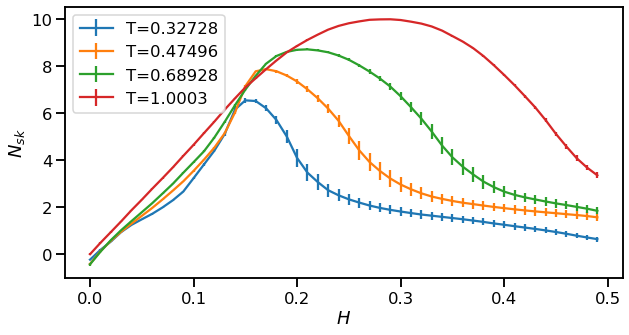

In [53]:
plt.figure(figsize = (10,5))
plt.errorbar(dfpoints.field[cut1],-dfpoints.Chern[cut1]/4/np.pi,dfpoints.Chern_err[cut1]/4/np.pi, label = "T="+str(T1))
plt.errorbar(dfpoints.field[cut2],-dfpoints.Chern[cut2]/4/np.pi,dfpoints.Chern_err[cut2]/4/np.pi, label = "T="+str(T2))
plt.errorbar(dfpoints.field[cut3],-dfpoints.Chern[cut3]/4/np.pi,dfpoints.Chern_err[cut3]/4/np.pi, label = "T="+str(T3))
plt.errorbar(dfpoints.field[cut4],-dfpoints.Chern[cut4]/4/np.pi,dfpoints.Chern_err[cut4]/4/np.pi, label = "T="+str(T4))
plt.ylabel(r"$N_{sk}$")
plt.xlabel(r"$H$")
plt.legend()

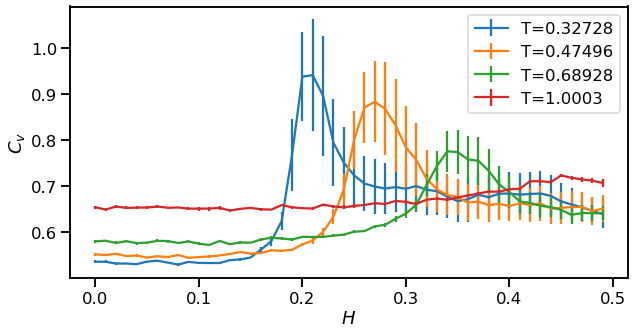

In [54]:
plt.figure(figsize = (10,5))
plt.errorbar(dfpoints.field[cut1],dfpoints.Cv[cut1],dfpoints.Cv_err[cut1], label = "T="+str(T1))
plt.errorbar(dfpoints.field[cut2],dfpoints.Cv[cut2],dfpoints.Cv_err[cut2], label = "T="+str(T2))
plt.errorbar(dfpoints.field[cut3],dfpoints.Cv[cut3],dfpoints.Cv_err[cut3], label = "T="+str(T3))
plt.errorbar(dfpoints.field[cut4],dfpoints.Cv[cut4],dfpoints.Cv_err[cut4], label = "T="+str(T4))
plt.ylabel(r"$C_v$")
plt.xlabel(r"$H$")
plt.legend()

## EOF